In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from monai.transforms import LoadImage, Spacing, Compose, LoadImaged, CenterSpatialCrop, EnsureChannelFirstd, NormalizeIntensityd
import glob
import os
from monai.data import Dataset, DataLoader
import torch
import subprocess
import itertools

2024-06-25 14:07:16.680043: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 14:07:16.961281: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 14:07:16.961367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 14:07:16.984274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-25 14:07:17.050768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [6]:
data_dir = "../preprocessed_chaos/T1/"
# data_dir ='../other/MR_withGT_proc/'

test_cases_fold_0 = [0, 1, 15, 17]
test_cases_fold_1 = [3, 5, 8, 11]
test_cases_fold_2 = [2, 13, 16, 18]
test_cases_fold_3 = [4, 9, 12, 19]
test_cases_fold_4 = [6, 7, 10, 14]


all_images = sorted(glob.glob(os.path.join(data_dir, "images/case_*")))
all_labels = sorted(glob.glob(os.path.join(data_dir, "labels/case_*")))



images = [glob.glob(all_images[idx]+ "/*.nii.gz") for idx in test_cases_fold_2]
imgs = sorted(list(itertools.chain.from_iterable(images)))
labels = [glob.glob(all_labels[idx]+ "/*.nii.gz") for idx in test_cases_fold_2]
labs = sorted(list(itertools.chain.from_iterable(labels)))

items = [15, 70, 40] #[59, 93, 110]

vis_imgs = [imgs[i] for i in items]
vis_labs = [labs[i] for i in items]

example_dataset = [{"image": img, "label": seg} for img, seg in zip(vis_imgs, vis_labs)]



print(len(example_dataset))
print(example_dataset)



3
[{'image': '../preprocessed_chaos/T1/images/case_10/slice_337.nii.gz', 'label': '../preprocessed_chaos/T1/labels/case_10/slice_337.nii.gz'}, {'image': '../preprocessed_chaos/T1/images/case_6/slice_211.nii.gz', 'label': '../preprocessed_chaos/T1/labels/case_6/slice_211.nii.gz'}, {'image': '../preprocessed_chaos/T1/images/case_3/slice_125.nii.gz', 'label': '../preprocessed_chaos/T1/labels/case_3/slice_125.nii.gz'}]


In [13]:
np.random.seed(42)

In [16]:
transforms = Compose([
    LoadImaged(keys=["image", "label"], image_only=False),
    #NormalizeIntensityd(keys=["image"])
    ])

In [17]:
example_patch_ds = Dataset(data=example_dataset, transform=transforms)
patch_data_loader = DataLoader(example_patch_ds, batch_size=1)

torch.Size([256, 256]) torch.Size([256, 256])
tensor([1.0000, 1.3555, 1.3555, 8.8000, 1.0000, 1.0000, 1.0000, 1.0000])


<Figure size 640x480 with 0 Axes>

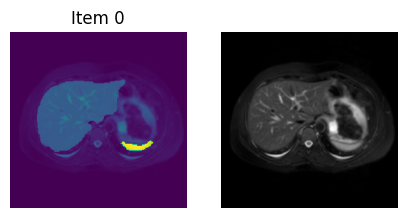

torch.Size([256, 256]) torch.Size([256, 256])
tensor([1.0000, 1.2734, 1.2734, 9.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<Figure size 640x480 with 0 Axes>

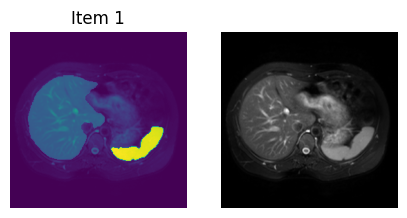

torch.Size([256, 256]) torch.Size([256, 256])
tensor([1.0000, 1.4062, 1.4062, 8.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<Figure size 640x480 with 0 Axes>

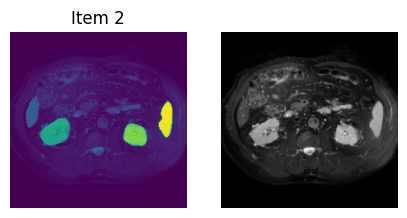

In [18]:
i=0

for batch in patch_data_loader:
    fig = plt.figure("visualize")
    image, label = batch["image"][0], batch["label"][0]
    print(image.shape, label.shape)    
    print(image.meta["pixdim"])
    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 2, 1)
    plt.title(f"Item {i}")
    plt.axis("off")
    plt.imshow((image.squeeze() + label.squeeze()/2) / 2)
    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")
    plt.show()
    

    i += 1
    

In [ ]:
example_patch_ds = Dataset(data=example_dataset, transform=transforms)
patch_data_loader = DataLoader(example_patch_ds, batch_size=3, shuffle=True)

In [ ]:
i=0

for batch in patch_data_loader:
    plt.figure()
    plt.subplot(1, 6, 1)
    plt.axis("off")
    plt.imshow(batch["image"][0].squeeze(0), cmap="gray")
    plt.subplot(1, 6, 2)
    plt.axis("off")
    plt.imshow(batch["label"][0].squeeze(0))
    plt.subplot(1, 6, 3)
    plt.axis("off")
    plt.imshow(batch["image"][1].squeeze(0), cmap="gray")
    plt.subplot(1, 6, 4)
    plt.axis("off")
    plt.imshow(batch["label"][1].squeeze(0))
    plt.subplot(1, 6, 5)
    plt.axis("off")
    plt.imshow(batch["image"][2].squeeze(0), cmap="gray")
    plt.subplot(1, 6, 6)
    plt.axis("off")
    plt.imshow(batch["label"][2].squeeze(0))
    
    plt.tight_layout()
    plt.show()

    i += 1
    if i == 10:
        break

In [ ]:
i=0

for batch in patch_data_loader:
    fig = plt.figure("visualize")
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(batch["image"][0].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(batch["image"][1].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(batch["image"][2].squeeze(0), cmap="gray")
    plt.tight_layout() 
    plt.savefig(f'example_MRI_{i}.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

    i += 1
    if i == 20:
        break
    
    
    